Dataset: https://www.kaggle.com/datasets/hasibalmuzdadid/global-air-pollution-dataset

# **Global Air Pollution Dataset**

Contains AQI values of different pollutants for many cities all over the world.

This dataset provides geolocated information about the following pollutants:

**Nitrogen Dioxide [NO2] : **

Nitrogen Dioxide is one of the several nitrogen oxides. It is introduced into the air by natural phenomena like entry from stratosphere or lighting. At the surface level, however, NO2 forms from cars, trucks and buses emissions, power plants and off-road equipment. Exposure over short periods can aggravate respiratory diseases, like asthma. Longer exposures may contribute to develoment of asthma and respiratory infections. People with asthma, children and the elderly are at greater risk for the health effects of NO2.

**Ozone [O3] : **

The Ozone molecule is harmful for outdoor air quality (if outside of the ozone layer). At surface level, ozone is created by chemical reactions between oxides of nitrogen and volatile organic compounds (VOC). Differently from the good ozone located in the upper atmosphere, ground level ozone can provoke several health problems like chest pain, coughing, throat irritation and airway inflammation. Furthermore it can reduce lung function and worsen bronchitis, emphysema, and asthma. Ozone affects also vegetation and ecosystems. In particular, it damages sensitive vegetation during the growing season.

**Carbon Monoxide [CO] : **

Carbon Monoxide is a colorless and odorless gas. Outdoor, it is emitted in the air above all by cars, trucks and other vehicles or machineries that burn fossil fuels. Such items like kerosene and gas space heaters, gas stoves also release CO affecting indoor air quality.
Breathing air with a high concentration of CO reduces the amount of oxygen that can be transported in the blood stream to critical organs like the heart and brain. At very high levels, which are not likely to occur outdoor but which are possible in enclosed environments. CO can cause dizziness, confusion, unconsciousness and death.

**Particulate Matter [PM2.5] :**

Atmospheric Particulate Matter, also known as atmospheric aerosol particles, are complex mixtures of small solid and liquid matter that get into the air. If inhaled they can cause serious heart and lungs problem. They have been classified as group 1 carcinogen by the International Agengy for Research on Cancer (IARC). PM10 refers to those particules with a diameter of 10 micrometers or less. PM2.5 refers to those particles with a diameter of 2.5 micrometers or less.

global air pollution dataset.csv

- **Country :** Name of the country
- **City :** Name of the city
- **AQI Value :** Overall AQI value of the city
- **AQI Category :** Overall AQI category of the city
- **CO AQI Value :** AQI value of Carbon Monoxide of the city
- **CO AQI Category :** AQI category of Carbon Monoxide of the city
- **Ozone AQI Value :** AQI value of Ozone of the city
- **Ozone AQI Category :** AQI category of Ozone of the city
- **NO2 AQI Value :** AQI value of Nitrogen Dioxide of the city
- **NO2 AQI Category :** AQI category of Nitrogen Dioxide of the city
- **PM2.5 AQI Value :** AQI value of Particulate Matter with a diameter of 2.5 micrometers or less of the city
- **PM2.5 AQI Category :** AQI category of Particulate Matter with a diameter of 2.5 micrometers or less of the city


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.linear_model import Ridge
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')

In [2]:
air_df = pd.read_csv("global_air_pollution.csv")
air_df.head()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good


In [3]:
air_df.describe()

,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value
count,23463.000000,23463.000000,23463.000000,23463.000000,23463.000000
mean,72.010868,1.368367,35.193709,3.063334,68.519755
std,56.055220,1.832064,28.098723,5.254108,54.796443
min,6.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,1.000000,21.000000,0.000000,35.000000
50%,55.000000,1.000000,31.000000,1.000000,54.000000
75%,79.000000,1.000000,40.000000,4.000000,79.000000
max,500.000000,133.000000,235.000000,91.000000,500.000000


In [4]:
air_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23463 entries, 0 to 23462
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country             23036 non-null  object
 1   City                23462 non-null  object
 2   AQI Value           23463 non-null  int64 
 3   AQI Category        23463 non-null  object
 4   CO AQI Value        23463 non-null  int64 
 5   CO AQI Category     23463 non-null  object
 6   Ozone AQI Value     23463 non-null  int64 
 7   Ozone AQI Category  23463 non-null  object
 8   NO2 AQI Value       23463 non-null  int64 
 9   NO2 AQI Category    23463 non-null  object
 10  PM2.5 AQI Value     23463 non-null  int64 
 11  PM2.5 AQI Category  23463 non-null  object
dtypes: int64(5), object(7)
memory usage: 2.1+ MB


In [5]:
air_df.isnull().sum()

,0
Country,427
City,1
AQI Value,0
AQI Category,0
CO AQI Value,0
CO AQI Category,0
Ozone AQI Value,0
Ozone AQI Category,0
NO2 AQI Value,0
NO2 AQI Category,0


In [6]:
# Check for duplicate rows
duplicates = air_df.duplicated()
print("Number of duplicate rows:", duplicates.sum())

Number of duplicate rows: 0


# **Exploratory Data Analysis(EDA)**

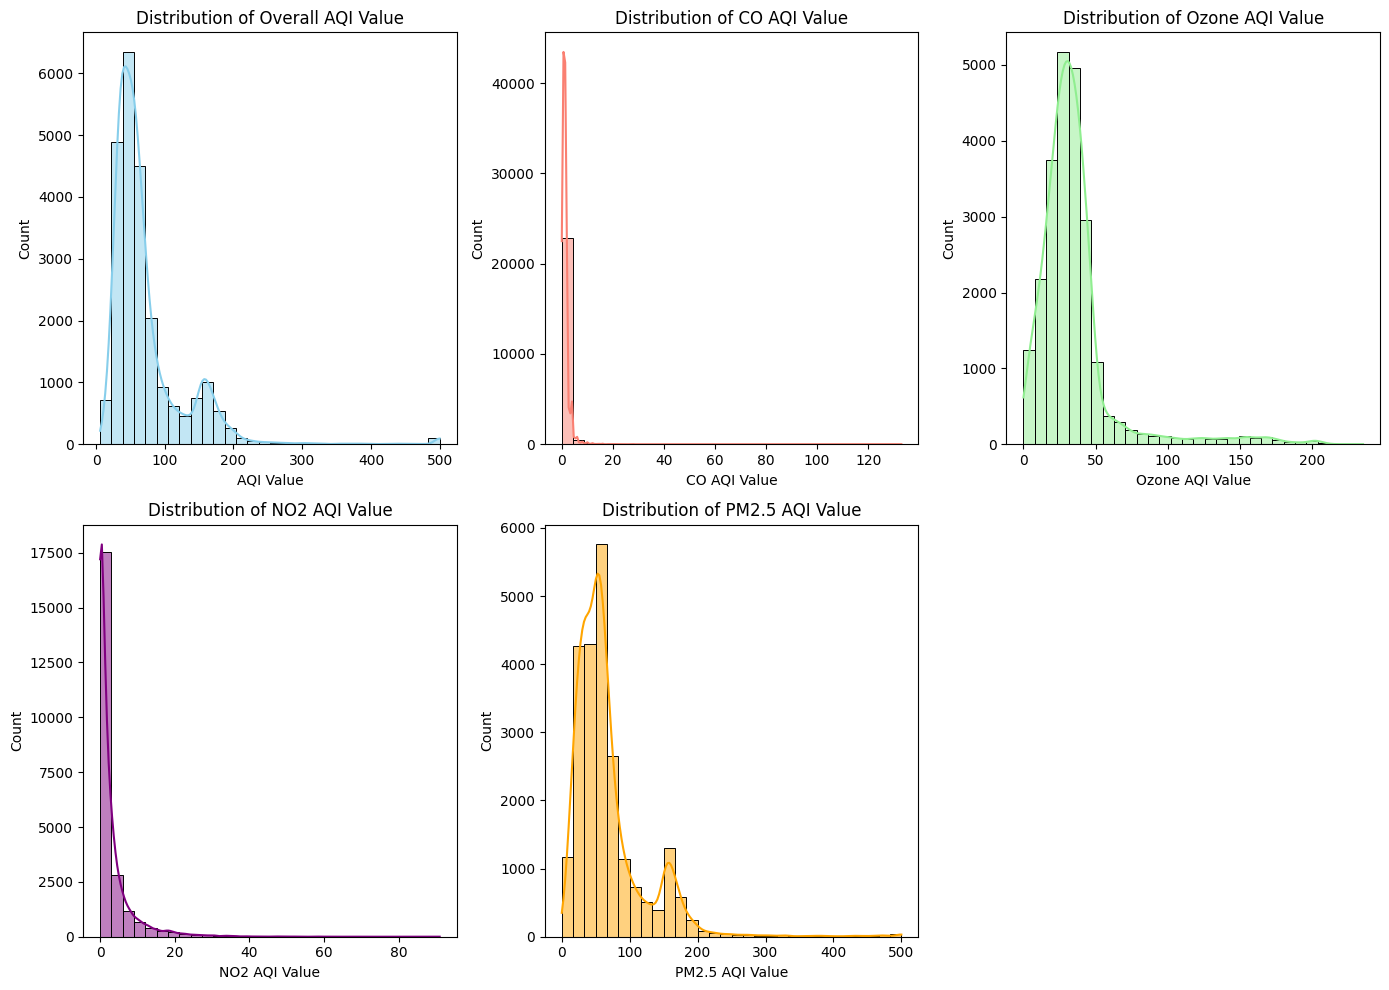

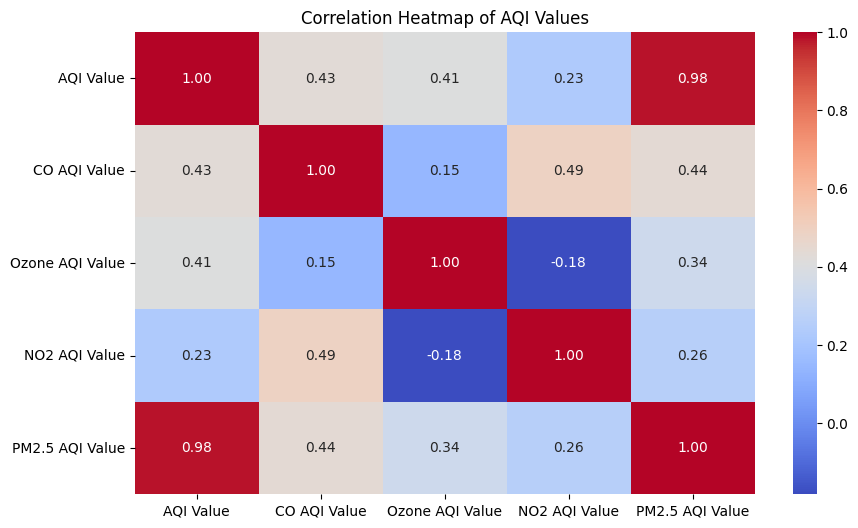

In [7]:
# Plotting distributions of AQI values for each pollutant
plt.figure(figsize=(14, 10))

# Overall AQI Value distribution
plt.subplot(2, 3, 1)
sns.histplot(air_df['AQI Value'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Overall AQI Value')

# CO AQI Value distribution
plt.subplot(2, 3, 2)
sns.histplot(air_df['CO AQI Value'], kde=True, bins=30, color='salmon')
plt.title('Distribution of CO AQI Value')

# Ozone AQI Value distribution
plt.subplot(2, 3, 3)
sns.histplot(air_df['Ozone AQI Value'], kde=True, bins=30, color='lightgreen')
plt.title('Distribution of Ozone AQI Value')

# NO2 AQI Value distribution
plt.subplot(2, 3, 4)
sns.histplot(air_df['NO2 AQI Value'], kde=True, bins=30, color='purple')
plt.title('Distribution of NO2 AQI Value')

# PM2.5 AQI Value distribution
plt.subplot(2, 3, 5)
sns.histplot(air_df['PM2.5 AQI Value'], kde=True, bins=30, color='orange')
plt.title('Distribution of PM2.5 AQI Value')

plt.tight_layout()
plt.show()

# Plotting correlation heatmap of AQI values
plt.figure(figsize=(10, 6))
aqi_corr = air_df[['AQI Value', 'CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']].corr()
sns.heatmap(aqi_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of AQI Values')
plt.show()


# **Visulaization Based on Countries**

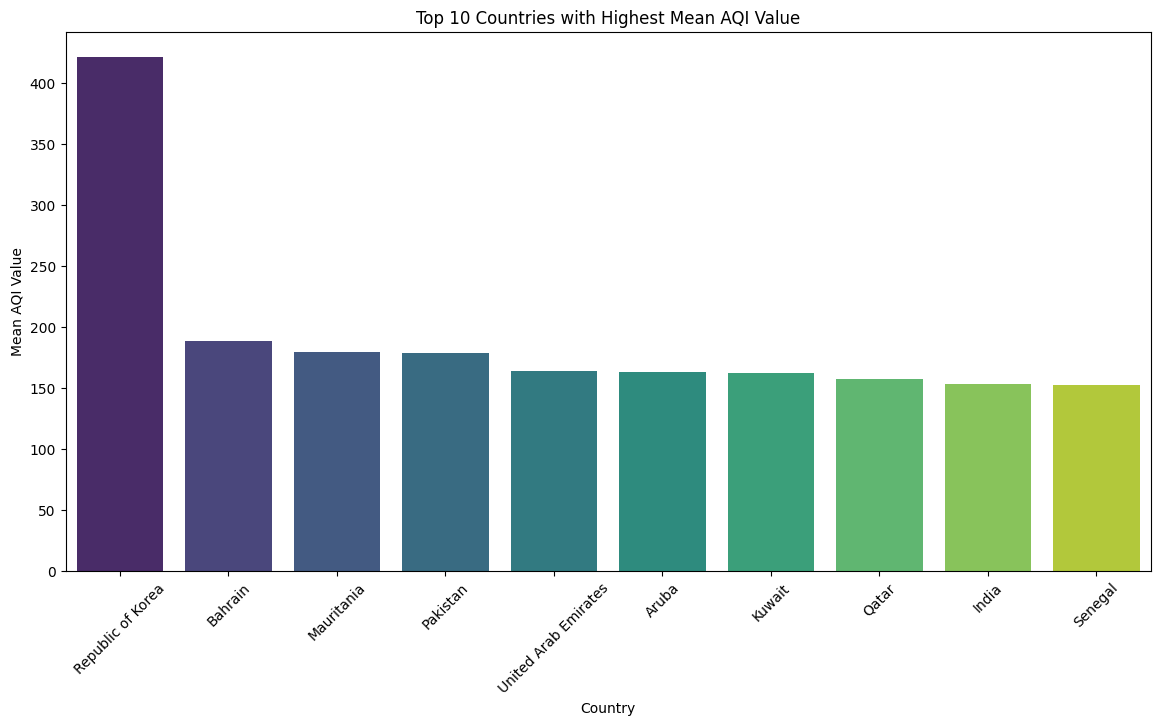

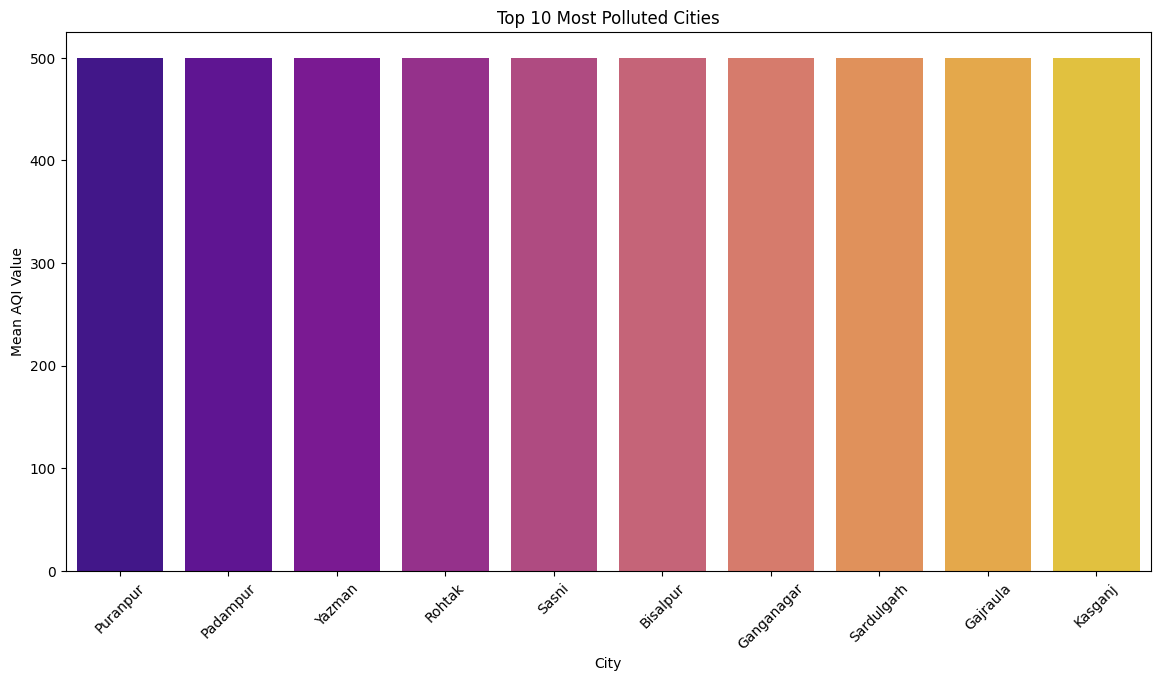

In [8]:
# Visualize the countries with the highest overall AQI
plt.figure(figsize=(14, 7))
country_aqi = air_df.groupby('Country')['AQI Value'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=country_aqi.index, y=country_aqi.values, palette='viridis')
plt.title("Top 10 Countries with Highest Mean AQI Value")
plt.xlabel("Country")
plt.ylabel("Mean AQI Value")
plt.xticks(rotation=45)
plt.show()

# Visualize the top 10 most polluted cities based on overall AQI
plt.figure(figsize=(14, 7))
city_aqi = air_df.groupby('City')['AQI Value'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=city_aqi.index, y=city_aqi.values, palette='plasma')
plt.title("Top 10 Most Polluted Cities")
plt.xlabel("City")
plt.ylabel("Mean AQI Value")
plt.xticks(rotation=45)
plt.show()

# **Focus on the top 20 countries with the most occurrences in each AQI category**

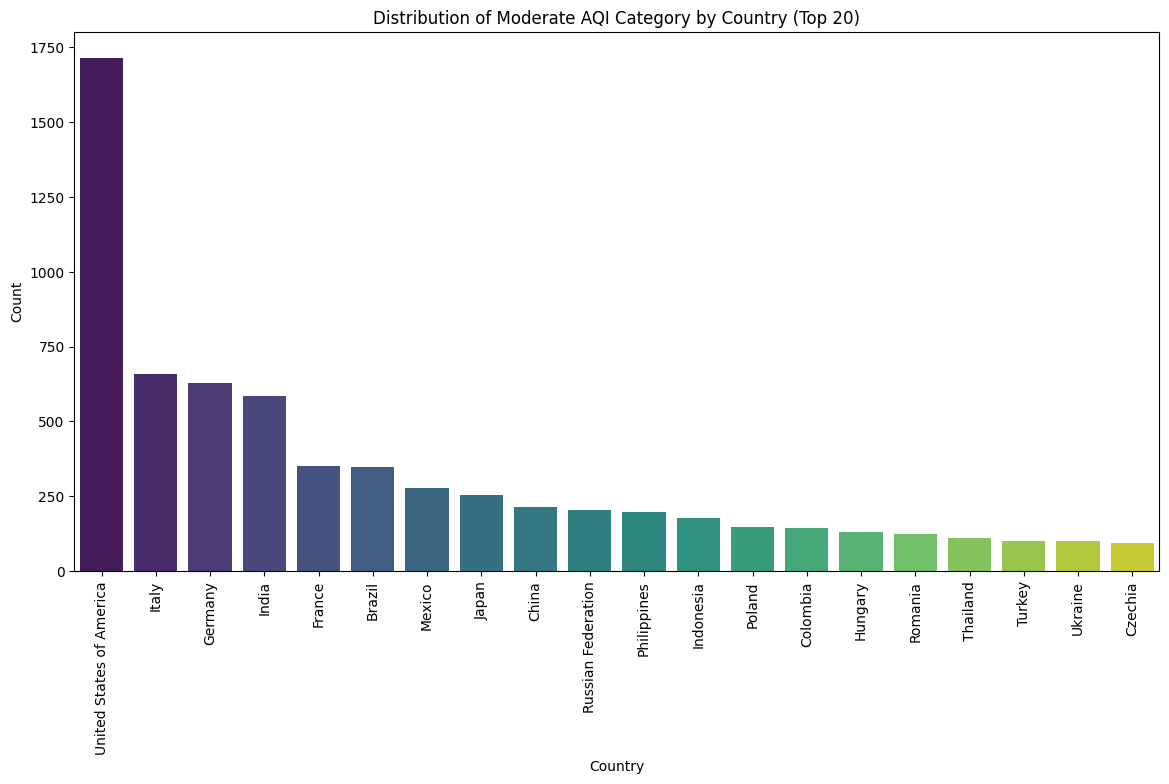

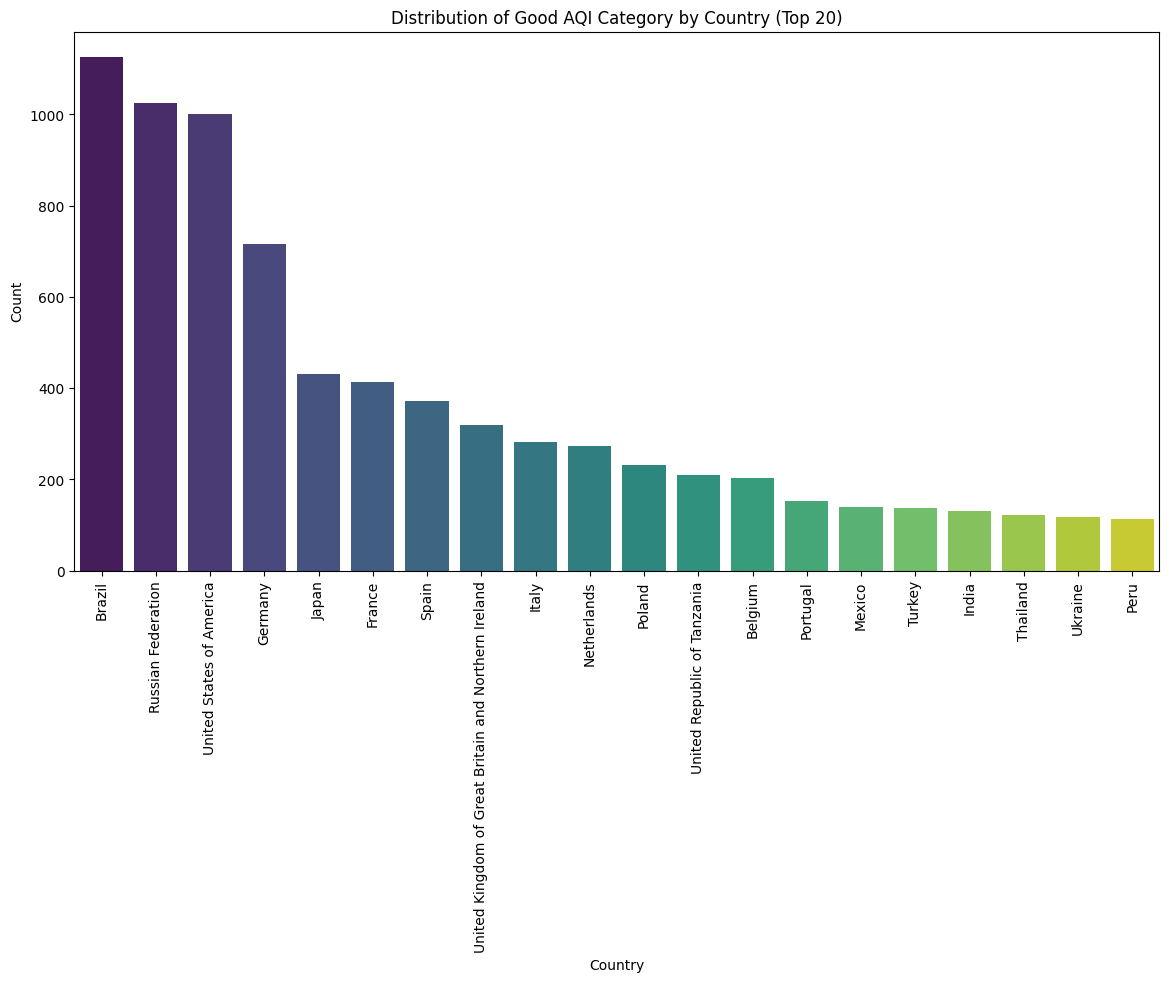

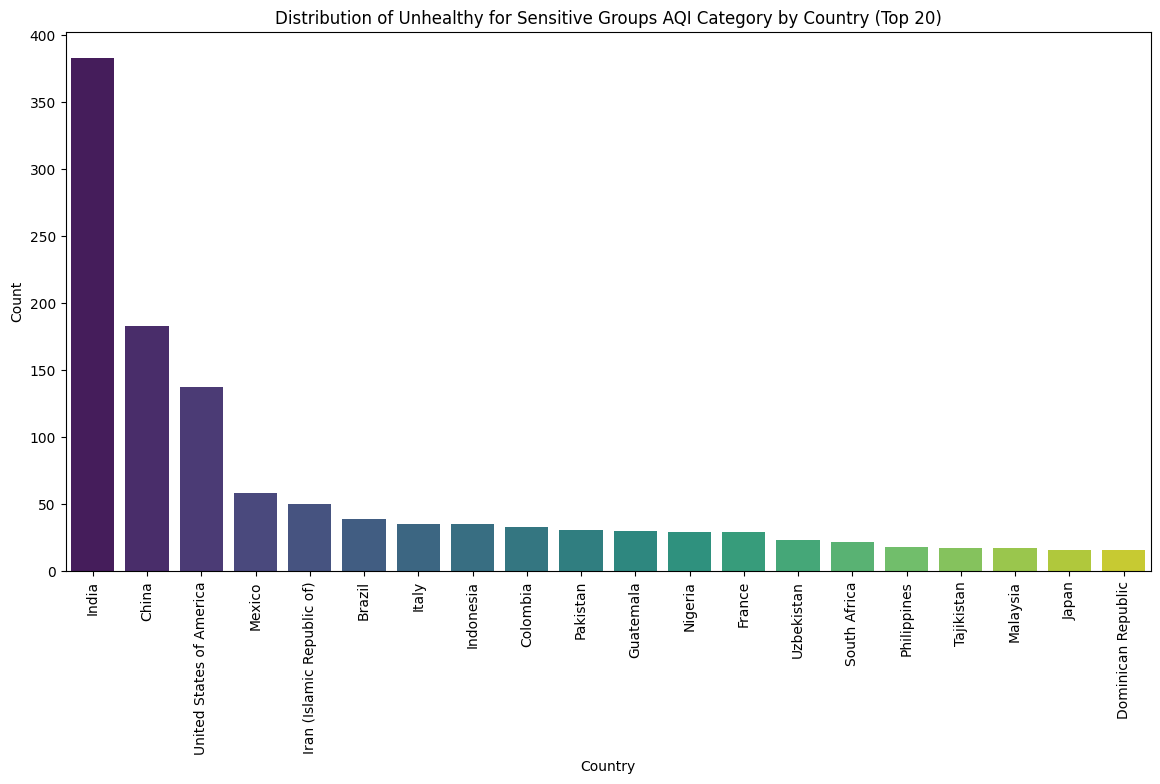

In [9]:
# Function to get top 20 countries for a category
def get_top_countries(df, category_name, top_n=20):
    top_countries = df['Country'].value_counts().head(top_n).index
    filtered_df = df[df['Country'].isin(top_countries)]
    return filtered_df

# Filter data and get top 20 countries for each category
moderate_df = get_top_countries(air_df[air_df['AQI Category'] == 'Moderate'], 'Moderate')
good_df = get_top_countries(air_df[air_df['AQI Category'] == 'Good'], 'Good')
unhealthy_sensitive_df = get_top_countries(air_df[air_df['AQI Category'] == 'Unhealthy for Sensitive Groups'], 'Unhealthy for Sensitive Groups')

# Modified function to create individual plots
def plot_aqi_category_by_country(df, category_name):
    plt.figure(figsize=(14, 7))
    sns.countplot(data=df, x='Country', order=df['Country'].value_counts().index, palette='viridis')
    plt.title(f"Distribution of {category_name} AQI Category by Country (Top 20)")  # Update title
    plt.xlabel("Country")
    plt.ylabel("Count")
    plt.xticks(rotation=90)
    plt.show()

# Create plots for each category
plot_aqi_category_by_country(moderate_df, 'Moderate')
plot_aqi_category_by_country(good_df, 'Good')
plot_aqi_category_by_country(unhealthy_sensitive_df, 'Unhealthy for Sensitive Groups')

# **Outlier Detection**

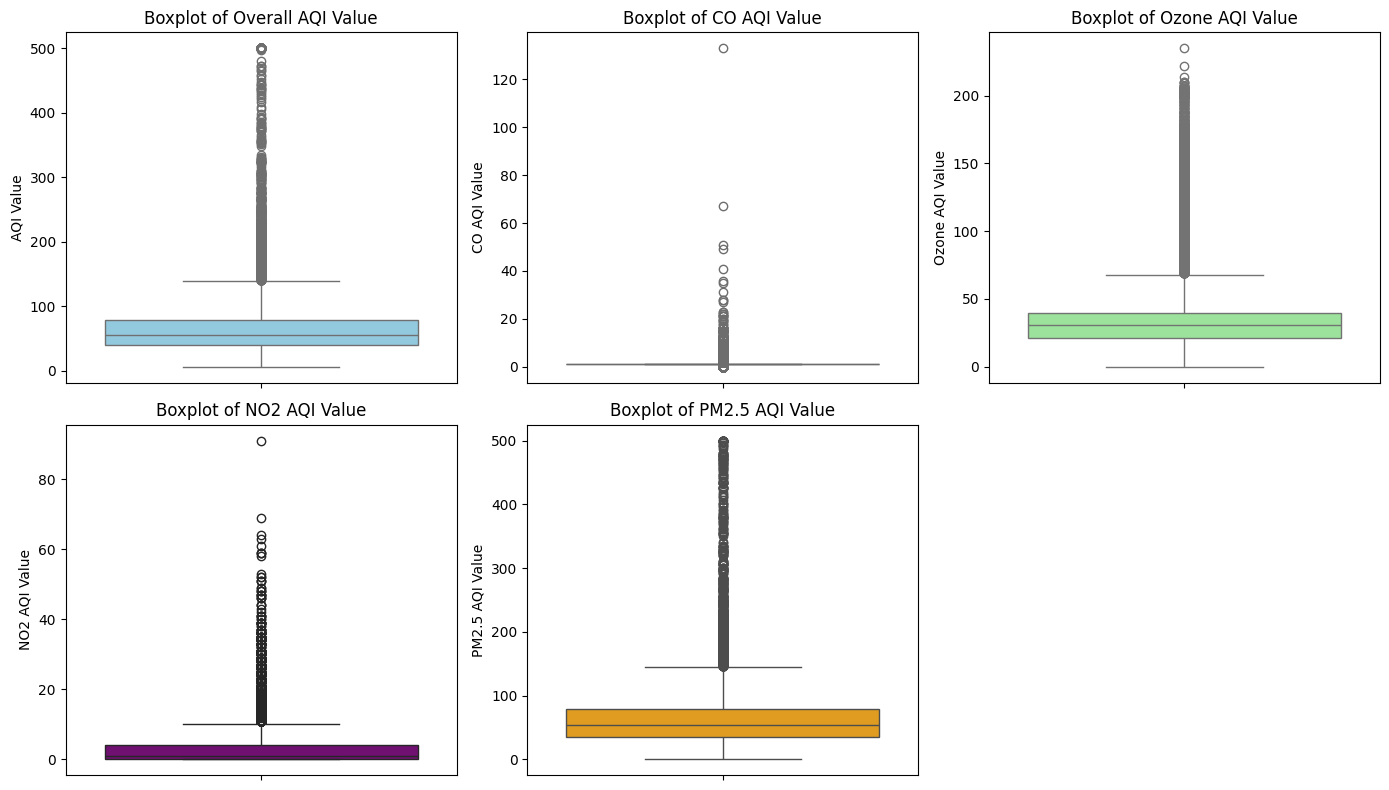

In [10]:
# Plotting boxplots for each AQI Value column to detect outliers
plt.figure(figsize=(14, 8))

# Overall AQI Value
plt.subplot(2, 3, 1)
sns.boxplot(y=air_df['AQI Value'], color='skyblue')
plt.title('Boxplot of Overall AQI Value')

# CO AQI Value
plt.subplot(2, 3, 2)
sns.boxplot(y=air_df['CO AQI Value'], color='salmon')
plt.title('Boxplot of CO AQI Value')

# Ozone AQI Value
plt.subplot(2, 3, 3)
sns.boxplot(y=air_df['Ozone AQI Value'], color='lightgreen')
plt.title('Boxplot of Ozone AQI Value')

# NO2 AQI Value
plt.subplot(2, 3, 4)
sns.boxplot(y=air_df['NO2 AQI Value'], color='purple')
plt.title('Boxplot of NO2 AQI Value')

# PM2.5 AQI Value
plt.subplot(2, 3, 5)
sns.boxplot(y=air_df['PM2.5 AQI Value'], color='orange')
plt.title('Boxplot of PM2.5 AQI Value')

plt.tight_layout()
plt.show()


# **Data Cleaning - Handling Missing Values and Outliers**

In [11]:
# Handling missing values (drop rows with missing Country data for simplicity)
air_df_cleaned = air_df.dropna(subset=['Country'])

# Remove outliers using IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers for AQI value columns
columns_to_check = ['AQI Value', 'CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']
for col in columns_to_check:
    air_df_cleaned = remove_outliers(air_df_cleaned, col)

print(air_df_cleaned.describe())


          AQI Value  CO AQI Value  Ozone AQI Value  NO2 AQI Value  \
count  12505.000000       12505.0     12505.000000   12505.000000   
mean      49.512435           1.0        31.778249       1.590564   
std       15.398488           0.0        11.600130       1.748313   
min        7.000000           1.0         0.000000       0.000000   
25%       38.000000           1.0        24.000000       0.000000   
50%       48.000000           1.0        32.000000       1.000000   
75%       59.000000           1.0        40.000000       3.000000   
max      100.000000           1.0        64.000000       7.000000   

       PM2.5 AQI Value  
count     12505.000000  
mean         46.263415  
std          18.720522  
min           2.000000  
25%          32.000000  
50%          47.000000  
75%          59.000000  
max         100.000000  


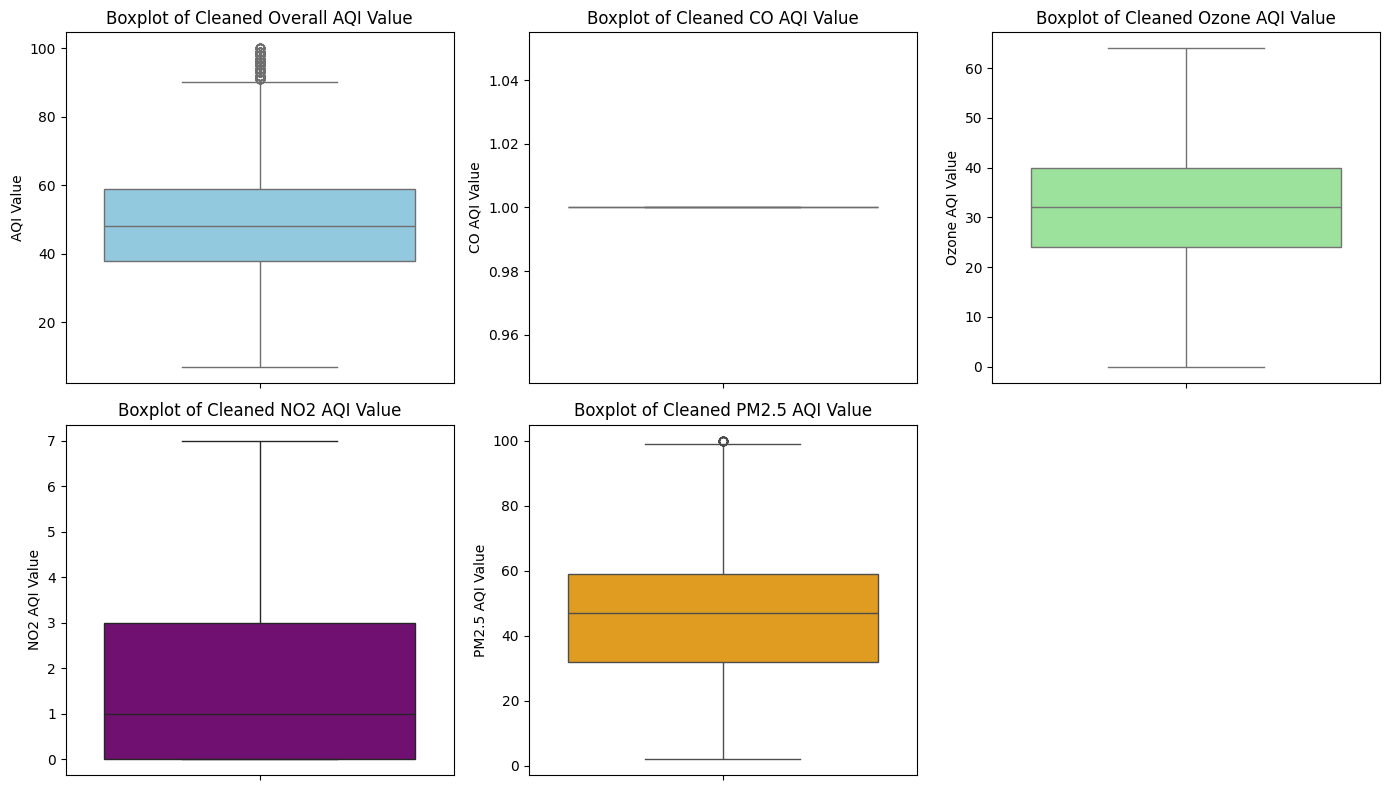

In [12]:
# Plotting boxplots for cleaned AQI Value columns to confirm outliers are removed
plt.figure(figsize=(14, 8))

# Overall AQI Value
plt.subplot(2, 3, 1)
sns.boxplot(y=air_df_cleaned['AQI Value'], color='skyblue')
plt.title('Boxplot of Cleaned Overall AQI Value')

# CO AQI Value
plt.subplot(2, 3, 2)
sns.boxplot(y=air_df_cleaned['CO AQI Value'], color='salmon')
plt.title('Boxplot of Cleaned CO AQI Value')

# Ozone AQI Value
plt.subplot(2, 3, 3)
sns.boxplot(y=air_df_cleaned['Ozone AQI Value'], color='lightgreen')
plt.title('Boxplot of Cleaned Ozone AQI Value')

# NO2 AQI Value
plt.subplot(2, 3, 4)
sns.boxplot(y=air_df_cleaned['NO2 AQI Value'], color='purple')
plt.title('Boxplot of Cleaned NO2 AQI Value')

# PM2.5 AQI Value
plt.subplot(2, 3, 5)
sns.boxplot(y=air_df_cleaned['PM2.5 AQI Value'], color='orange')
plt.title('Boxplot of Cleaned PM2.5 AQI Value')

plt.tight_layout()
plt.show()


# **Encoding Categorical Variables**

In [13]:
# Encode AQI categories using LabelEncoder (or OneHotEncoder if necessary)
label_encoder = LabelEncoder()
categorical_columns = ['AQI Category', 'CO AQI Category', 'Ozone AQI Category', 'NO2 AQI Category', 'PM2.5 AQI Category']

for col in categorical_columns:
    air_df_cleaned[col] = label_encoder.fit_transform(air_df_cleaned[col])

print(air_df_cleaned.head())


              Country              City  AQI Value  AQI Category  \
0  Russian Federation        Praskoveya         51             1   
1              Brazil  Presidente Dutra         41             0   
2               Italy   Priolo Gargallo         66             1   
3              Poland         Przasnysz         34             0   
6             Germany        Puttlingen         62             1   

   CO AQI Value  CO AQI Category  Ozone AQI Value  Ozone AQI Category  \
0             1                0               36                   0   
1             1                0                5                   0   
2             1                0               39                   0   
3             1                0               34                   0   
6             1                0               35                   0   

   NO2 AQI Value  NO2 AQI Category  PM2.5 AQI Value  PM2.5 AQI Category  
0              0                 0               51                   1  
1   

# **Feature Selection and Splitting Data**

In [14]:
# Selecting features and target variable
features = ['CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']
target = 'AQI Value'

X = air_df_cleaned[features]
y = air_df_cleaned[target]

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# **Model Training and Evaluation**

In [15]:
# Initialize models
models = {
    "Ridge": Ridge(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Extra Tree Regressor": ExtraTreesRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42)
}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Results for {model_name}:")
    print(f"R^2 Score: {r2_score(y_test, y_pred)}")
    print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")
    print(f"MSE: {mean_squared_error(y_test, y_pred)}")
    print(f"MAPE: {np.mean(np.abs((y_test - y_pred) / y_test)) * 100}%\n")


Results for Ridge:
R^2 Score: 0.894036789778576
MAE: 3.74171672701152
RMSE: 4.868814849395045
MSE: 23.7053580376897
MAPE: 8.724353194358562%

Results for Random Forest:
R^2 Score: 0.9999596433612724
MAE: 0.009780087964814069
RMSE: 0.09501741249123445
MSE: 0.009028308676529396
MAPE: 0.03068054769794954%

Results for Extra Tree Regressor:
R^2 Score: 0.9999853560224736
MAE: 0.007229108356657351
RMSE: 0.0572367852011967
MSE: 0.0032760495801679294
MAPE: 0.021705364790345287%

Results for XGBoost:
R^2 Score: 0.9999707341194153
MAE: 0.018716905175185785
RMSE: 0.0809055560111477
MSE: 0.006545708993472958
MAPE: 0.05621466518086415%



# **Visualize Actual vs. Predicted Values:**

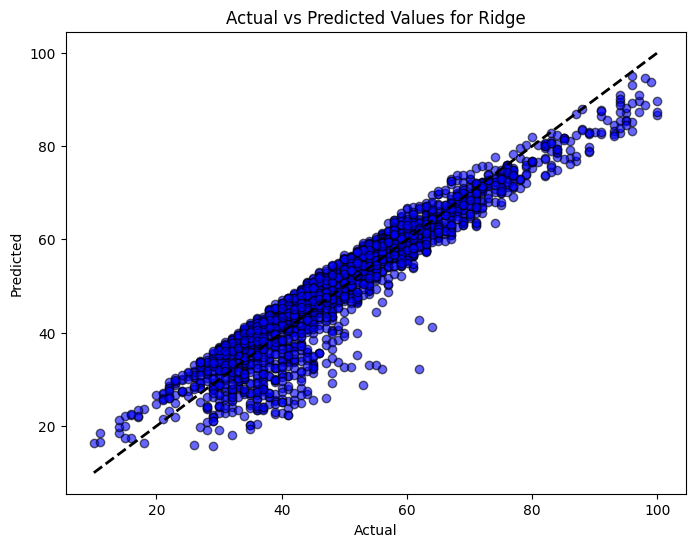

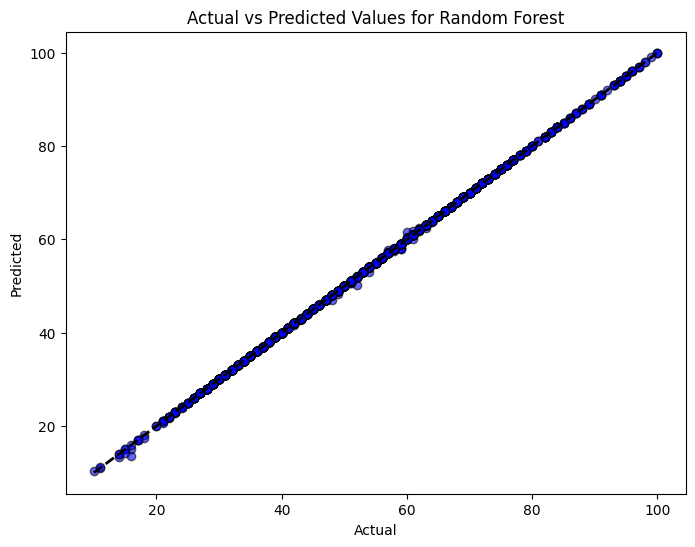

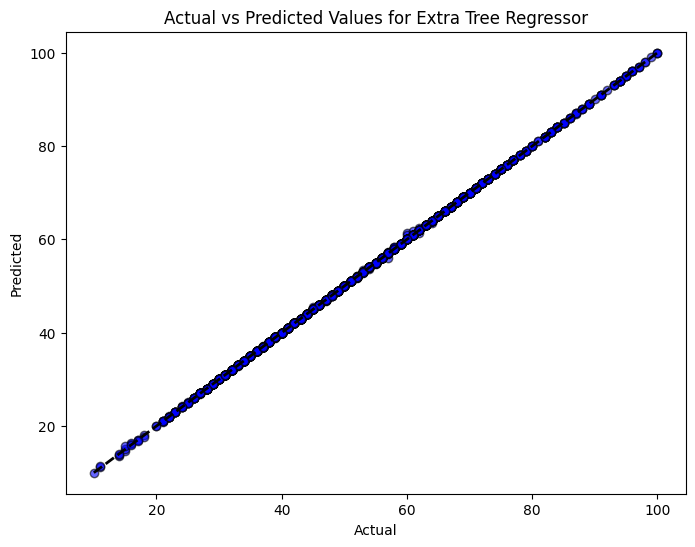

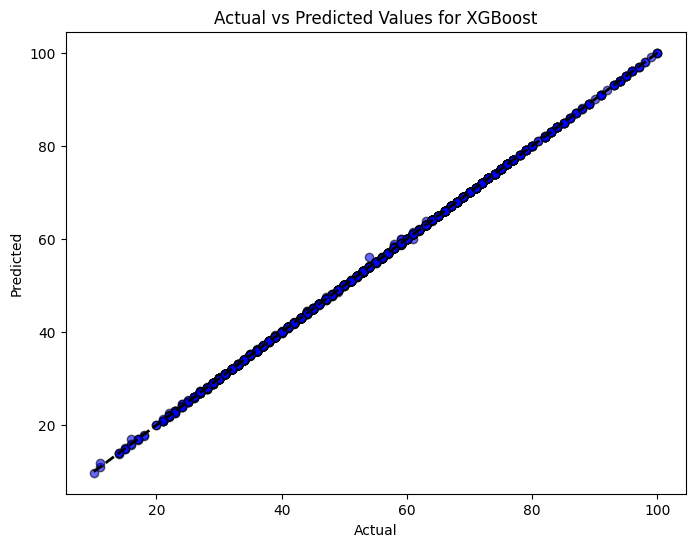

In [16]:
def plot_actual_vs_predicted(y_test, y_pred, model_name):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'Actual vs Predicted Values for {model_name}')
    plt.show()

for model_name, model in models.items():
    y_pred = model.predict(X_test)
    plot_actual_vs_predicted(y_test, y_pred, model_name)


Top 20 Countries with Highest Predicted Air Pollution (AQI):
Country
Singapore                91.000000
Somalia                  90.000000
Saint Kitts and Nevis    90.000000
Congo                    89.000000
Saudi Arabia             85.000000
Jordan                   84.571429
Eritrea                  83.250000
Afghanistan              82.750000
Tajikistan               82.000000
Haiti                    81.500000
Yemen                    81.000000
Pakistan                 79.250000
Trinidad and Tobago      77.600000
Uzbekistan               77.555556
Chad                     72.125000
Dominican Republic       71.100000
Israel                   71.000000
Egypt                    70.625000
Slovenia                 70.142857
Turkmenistan             69.571429
Name: Predicted AQI Value, dtype: float64


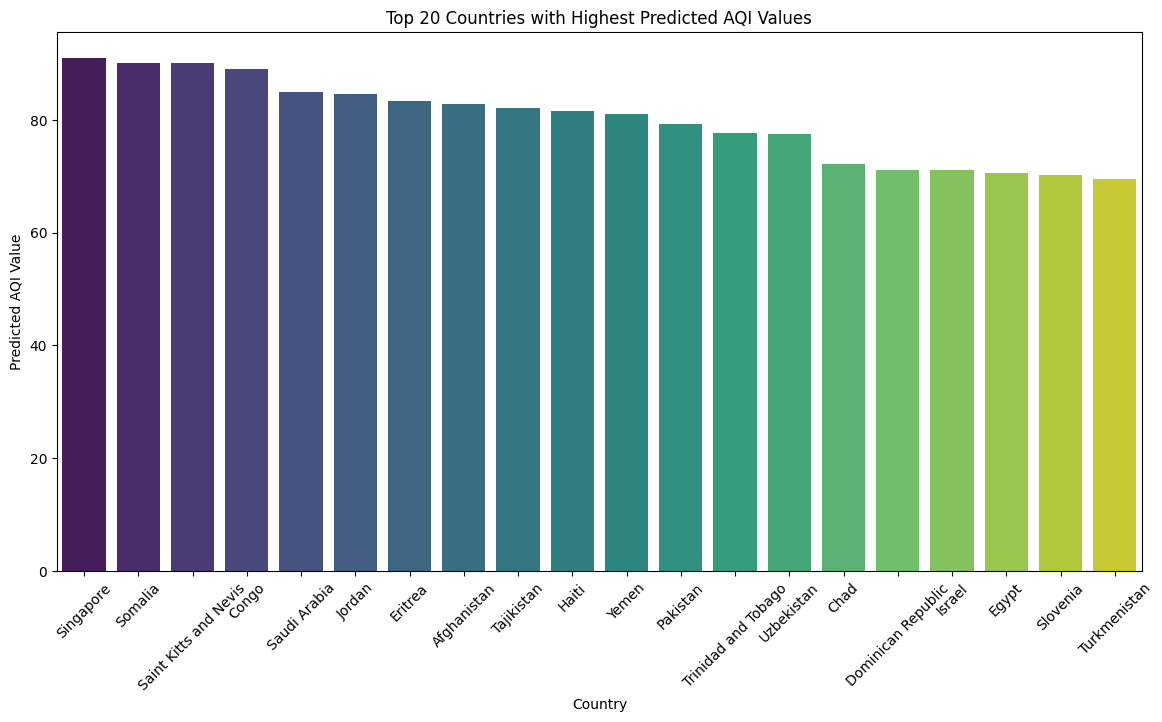

In [17]:
# 1. Re-train the best model on the entire dataset (assume RandomForest is the best model)
best_model = ExtraTreesRegressor(n_estimators=100, random_state=42)
X = air_df_cleaned.drop(['AQI Value', 'Country', 'City'], axis=1)
y = air_df_cleaned['AQI Value']
best_model.fit(X, y)

# 2. Make predictions on the dataset
air_df_cleaned['Predicted AQI Value'] = best_model.predict(X)

# 3. Calculate the average predicted AQI per country
country_pollution = air_df_cleaned.groupby('Country')['Predicted AQI Value'].mean().sort_values(ascending=False)

# 4. Display the top 20 most polluted countries based on predicted AQI
top_20_countries = country_pollution.head(20)
print("Top 20 Countries with Highest Predicted Air Pollution (AQI):")
print(top_20_countries)

# Visualize the top 20 most polluted countries
plt.figure(figsize=(14, 7))
sns.barplot(x=top_20_countries.index, y=top_20_countries.values, palette='viridis')
plt.title("Top 20 Countries with Highest Predicted AQI Values")
plt.xlabel("Country")
plt.ylabel("Predicted AQI Value")
plt.xticks(rotation=45)
plt.show()


# **Deployment for Prediction**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
import pickle

# Load the dataset (for deployment, use new unseen data file path)
file_path = '/data/global_air_pollution.csv'
new_data = pd.read_csv(file_path)

# Data Preprocessing
def preprocess_data(data):
    # Drop rows with missing Country data
    data_cleaned = data.dropna(subset=['Country'])

    # Convert AQI Category columns to categorical types for analysis
    category_columns = ['AQI Category', 'CO AQI Category', 'Ozone AQI Category', 'NO2 AQI Category', 'PM2.5 AQI Category']
    for col in category_columns:
        le = LabelEncoder()
        data_cleaned[col] = le.fit_transform(data_cleaned[col])

    return data_cleaned

# Preprocess the new data
new_data_cleaned = preprocess_data(new_data)

# Separate features
X_new = new_data_cleaned.drop(['AQI Value', 'Country', 'City'], axis=1)

# Load the trained model (RandomForest in this case)
# Assuming that we have already saved the trained model
model_filename = 'best_model_rf.pkl'
with open(model_filename, 'rb') as file:
    trained_model = pickle.load(file)

# Predict AQI values using the trained model
new_data_cleaned['Predicted AQI Value'] = trained_model.predict(X_new)

# Rank countries based on predicted AQI
country_pollution_new = new_data_cleaned.groupby('Country')['Predicted AQI Value'].mean().sort_values(ascending=False)

# Display the top 20 most polluted countries based on predicted AQI
top_20_countries_new = country_pollution_new.head(20)
print("Top 20 Countries with Highest Predicted Air Pollution (AQI):")
print(top_20_countries_new)

# Visualize the top 20 most polluted countries
plt.figure(figsize=(14, 7))
sns.barplot(x=top_20_countries_new.index, y=top_20_countries_new.values, palette='plasma')
plt.title("Top 20 Countries with Highest Predicted AQI Values")
plt.xlabel("Country")
plt.ylabel("Predicted AQI Value")
plt.xticks(rotation=45)
plt.show()


In [ ]:
import pickle

# Save the best model
with open('best_model_rf.pkl', 'wb') as file:
    pickle.dump(best_model, file)
